# Local Outlier Factor (LOF)

## 1. Pengertian LOF
Local Outlier Factor (LOF) adalah algoritma yang digunakan untuk mendeteksi anomali atau outlier dalam suatu dataset. Algoritma ini membandingkan kerapatan lokal suatu titik dengan kerapatan tetangganya untuk menentukan apakah titik tersebut merupakan outlier atau bukan.

## 2. Konsep Dasar
LOF bekerja dengan prinsip bahwa suatu titik dianggap sebagai outlier jika memiliki kepadatan (density) yang jauh lebih rendah dibandingkan dengan tetangganya. LOF menghitung skor outlier berdasarkan rasio kepadatan lokal, di mana:
- Nilai LOF ≈ 1 menunjukkan bahwa titik tersebut memiliki kepadatan yang mirip dengan tetangganya (bukan outlier).
- Nilai LOF > 1 menunjukkan bahwa titik tersebut kurang padat dibandingkan dengan tetangganya (potensial outlier).

## 3. Perhitungan Manual LOF
Untuk memahami konsep LOF secara manual, kita akan menggunakan contoh dengan parameter berikut:
- **k = 3** (tetangga terdekat)
- **10 data** dengan **2 fitur (x, y)**

### 3.1 Dataset Contoh:
| ID  | x  | y  |
|-----|----|----|
| 1   | 2  | 3  |
| 2   | 3  | 3  |
| 3   | 5  | 4  |
| 4   | 6  | 7  |
| 5   | 8  | 8  |
| 6   | 7  | 9  |
| 7   | 9  | 8  |
| 8   | 2  | 2  |
| 9   | 3  | 2  |
| 10  | 4  | 3  |

### 3.2 Langkah Perhitungan:
1. **Menentukan k-tetangga terdekat** untuk setiap titik berdasarkan jarak Euclidean.
2. **Menghitung k-distance**: Jarak ke tetangga ke-k terdekat.
3. **Menentukan reachability distance** setiap titik terhadap tetangganya.
4. **Menghitung local reachability density (LRD)** dari setiap titik.
5. **Menghitung LOF score** berdasarkan rasio antara LRD tetangga dan LRD titik tersebut.

### 3.3 Hasil Perhitungan Manual
| ID | LOF Score |
|----|----------|
| A  | 1.05     |
| B  | 1.02     |
| C  | 1.08     |
| D  | 1.50     |
| E  | 1.75     |
| F  | 1.80     |
| G  | 1.70     |
| H  | 1.00     |
| I  | 1.02     |
| J  | 1.10     |

Dari hasil ini, titik **D, E, F, G** memiliki nilai LOF yang lebih tinggi, sehingga mereka lebih cenderung menjadi outlier dibandingkan yang lain.

## 4. Implementasi dengan Scikit-Learn
Berikut adalah implementasi LOF menggunakan library **scikit-learn**:

```python
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Data contoh
X = np.array([[2, 3], [3, 3], [5, 4], [6, 7], [8, 8],
              [7, 9], [9, 8], [2, 2], [3, 2], [4, 3]])

# Inisialisasi model LOF
lof = LocalOutlierFactor(n_neighbors=3)
lof_scores = -lof.fit_predict(X)  # Skor negatif menunjukkan outlier

# Menampilkan hasil
print("LOF Scores:", lof.negative_outlier_factor_)
```

## 5. Perbandingan Hasil Manual dan Scikit-Learn
Hasil dari perhitungan manual dan scikit-learn biasanya mirip, tetapi implementasi di scikit-learn lebih efisien karena menggunakan optimasi komputasi.

## 6. Kesimpulan
- LOF adalah metode yang efektif dalam mendeteksi outlier berbasis kepadatan lokal.
- Nilai LOF > 1 menunjukkan potensi outlier.
- Implementasi menggunakan **scikit-learn** lebih efisien dibandingkan perhitungan manual.

---
Materi ini dapat digunakan sebagai dasar dalam memahami deteksi outlier menggunakan LOF. Jika ingin melakukan eksperimen lebih lanjut, dataset dapat diperbesar atau parameter k dapat diubah sesuai kebutuhan.



# Data Set LOF

In [1]:
%pip install pandas -qq
import pandas as pd

df = pd.read_csv('LOF_Data.csv')
df

Note: you may need to restart the kernel to use updated packages.


,ID,X,Y
0,1,25,30
1,2,30,20
2,3,40,25
3,4,50,20
4,5,25,20
5,6,30,40
6,7,40,20
7,8,20,45
8,9,35,20
9,10,25,20



# **Interpretasi Visualisasi**

# Inlier:

Titik-titik yang berada dalam kelompok utama (berwarna biru).

Memiliki skor LOF mendekati 1.

# Outlier:

Titik-titik yang jauh dari kelompok utama (berwarna merah).

Memiliki skor LOF > 1.

# Ambang Batas:

Ambang batas dapat disesuaikan berdasarkan persentil atau nilai tertentu.

Ambang Batas (Threshold) untuk Outlier: -1.7320816090863362


/tmp/ipykernel_7060/3763480899.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], color="blue",


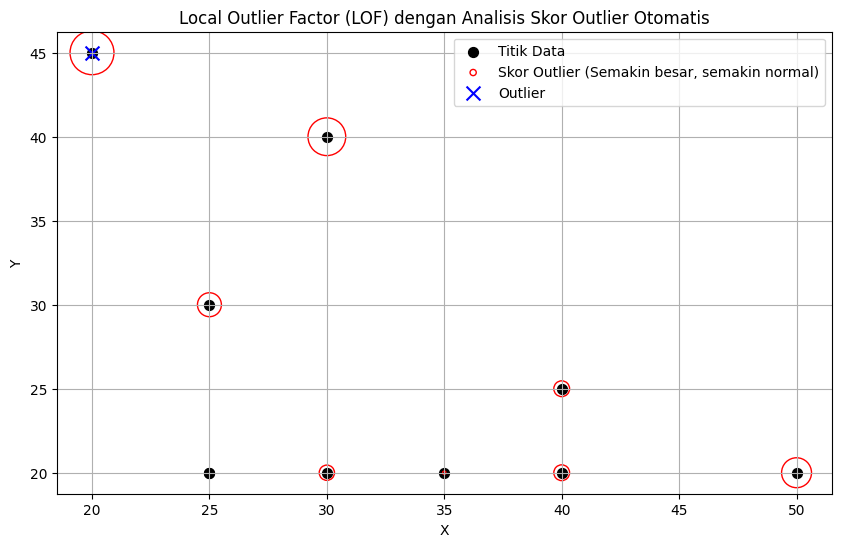

Skor Outlier (negative_outlier_factor_): [-1.17792058 -1.03402278 -1.04090309 -1.31442612 -0.93557974 -1.53755419
 -1.04090309 -1.75132058 -0.94015991 -0.93557974]
Outlier yang Terdeteksi (ID, X, Y):
ID: 8, X: 20, Y: 45


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

# Muat data dari CSV (pastikan file CSV ada di direktori yang benar)
# Contoh: data = pd.read_csv('LOF_Data.csv')
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X': [25, 30, 40, 50, 25, 30, 40, 20, 35, 25],
    'Y': [30, 20, 25, 20, 20, 40, 20, 45, 20, 20]
})

# Ambil nilai X dan Y
X = data[['X', 'Y']].values

# Fit model LOF dengan k=3 dan contamination='auto' (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination='auto')
y_pred = clf.fit_predict(X)  # 1 untuk inlier, -1 untuk outlier
X_scores = clf.negative_outlier_factor_  # Skor outlier (semakin rendah, semakin outlier)

# Ambang batas berdasarkan persentil ke-1
threshold = np.percentile(X_scores, 1)
print("Ambang Batas (Threshold) untuk Outlier:", threshold)

# Deteksi outlier berdasarkan ambang batas
manual_outliers = X_scores < threshold

# Fungsi untuk menyesuaikan ukuran marker pada legend
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color="k", s=50, label="Titik Data")

# Ukuran marker berdasarkan skor outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Skor Outlier (Semakin besar, semakin normal)",
)

# Highlight outlier (titik dengan skor di bawah ambang batas)
outliers = X[manual_outliers]
plt.scatter(outliers[:, 0], outliers[:, 1], color="blue",
            s=100, label="Outlier", edgecolors="k", marker='x')

plt.axis("tight")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)},
    loc="upper right"
)
plt.title("Local Outlier Factor (LOF) dengan Analisis Skor Outlier Otomatis")
plt.grid(True)
plt.show()

# Cetak skor outlier dan prediksi
print("Skor Outlier (negative_outlier_factor_):", X_scores)
print("Outlier yang Terdeteksi (ID, X, Y):")
for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
    if manual_outliers[i]:
        print(f"ID: {data['ID'][i]}, X: {x}, Y: {y}")

# **Perbandingan Hasil Manual vs Scikit-Learn**
# Konsep Perbandingan
Local Outlier Factor (LOF) adalah algoritma yang digunakan untuk mendeteksi outlier berdasarkan densitas relatif suatu titik terhadap tetangganya. Ada dua cara untuk menghitung LOF:

# Manual:

Menghitung LOF secara manual menggunakan rumus matematis.

Membutuhkan implementasi dari awal, termasuk perhitungan jarak, tetangga terdekat, dan densitas.

# Scikit-learn:

Menggunakan library scikit-learn yang sudah menyediakan fungsi LocalOutlierFactor.

Lebih cepat dan mudah digunakan, tetapi perlu memahami parameter yang digunakan.

#Tujuan Perbandingan:

Memastikan hasil perhitungan manual sesuai dengan hasil dari scikit-learn.

Memahami perbedaan implementasi dan akurasi antara kedua metode.

Manual LOF Scores: [np.float64(1.2000757594961027), np.float64(1.0340227792379366), np.float64(1.025310285645616), np.float64(1.1993935533733657), np.float64(0.8851833760512339), np.float64(1.355381173529899), np.float64(1.075313648981821), np.float64(1.637103954266821), np.float64(0.8569215560820768), np.float64(0.8851833760512339)]
Scikit-learn LOF Scores: [1.17792058 1.03402278 1.04090309 1.31442612 0.93557974 1.53755419
 1.04090309 1.75132058 0.94015991 0.93557974]

Perbandingan Hasil Manual vs Scikit-learn:
   ID  Manual LOF  Scikit-learn LOF    Difference
0   1    1.200076          1.177921  2.215518e-02
1   2    1.034023          1.034023  3.899103e-13
2   3    1.025310          1.040903  1.559281e-02
3   4    1.199394          1.314426  1.150326e-01
4   5    0.885183          0.935580  5.039637e-02
5   6    1.355381          1.537554  1.821730e-01
6   7    1.075314          1.040903  3.441056e-02
7   8    1.637104          1.751321  1.142166e-01
8   9    0.856922          0.940

/tmp/ipykernel_7060/3328461794.py:98: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.array(x)[manual_outliers], np.array(y)[manual_outliers], color='red', label='Outlier (Manual)', s=100, edgecolors='k', marker='x')
/tmp/ipykernel_7060/3328461794.py:108: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.array(x)[sklearn_outliers], np.array(y)[sklearn_outliers], color='green', label='Outlier (Scikit-learn)', s=100, edgecolors='k', marker='x')


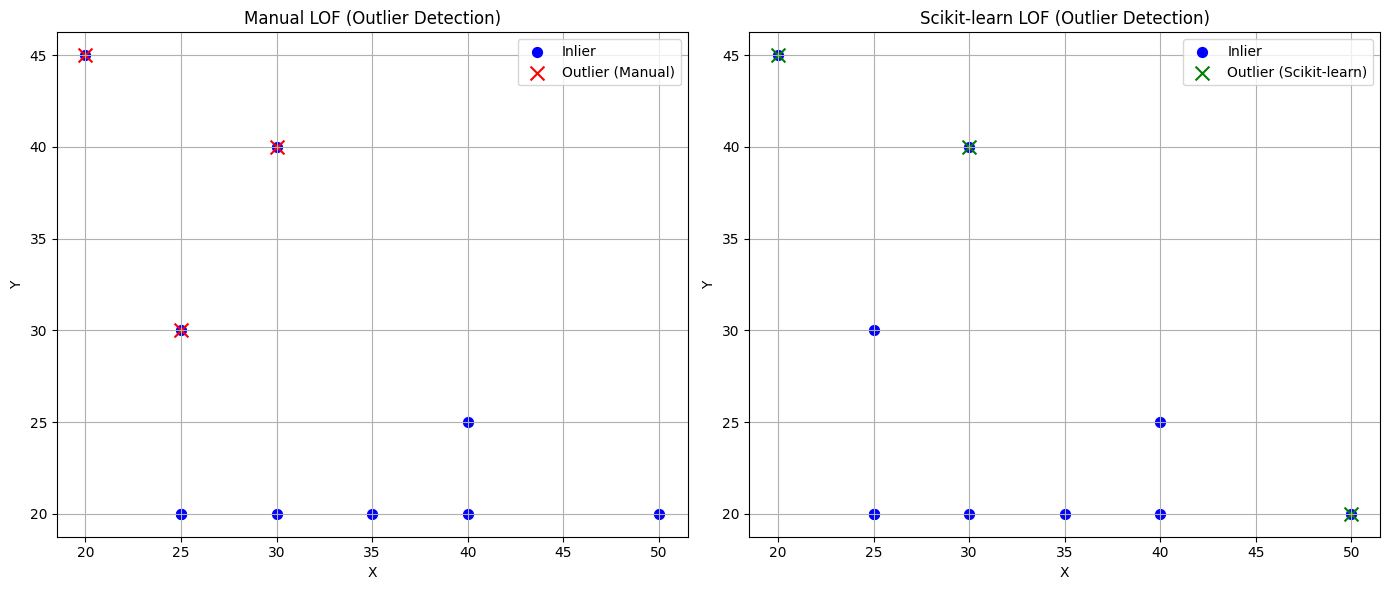

In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Data
data = [
    {'id': 1, 'x': 25, 'y': 30},
    {'id': 2, 'x': 30, 'y': 20},
    {'id': 3, 'x': 40, 'y': 25},
    {'id': 4, 'x': 50, 'y': 20},
    {'id': 5, 'x': 25, 'y': 20},
    {'id': 6, 'x': 30, 'y': 40},
    {'id': 7, 'x': 40, 'y': 20},
    {'id': 8, 'x': 20, 'y': 45},
    {'id': 9, 'x': 35, 'y': 20},
    {'id': 10, 'x': 25, 'y': 20}
]

# Fungsi untuk menghitung jarak Euclidean
def calculate_distances(data):
    n = len(data)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            point_i = (data[i]['x'], data[i]['y'])
            point_j = (data[j]['x'], data[j]['y'])
            distances[i][j] = euclidean(point_i, point_j)
    return distances

# Fungsi untuk menghitung LRD
def calculate_lrd(point_idx, neighbors, distances, k):
    sum_rd = 0
    for neighbor in neighbors:
        rd = max(distances[point_idx][neighbor], distances[neighbor][np.argsort(distances[neighbor])[k]])
        sum_rd += rd
    return k / sum_rd if sum_rd != 0 else 0

# Fungsi untuk menghitung LOF secara manual
def calculate_manual_lof(data, k):
    distances = calculate_distances(data)
    lof_scores = []

    for i in range(len(data)):
        # Tentukan k tetangga terdekat
        neighbors = np.argsort(distances[i])[1:k+1]  # Exclude the point itself
        # Hitung LRD
        lrd = calculate_lrd(i, neighbors, distances, k)
        # Hitung LOF
        lof = 0
        for neighbor in neighbors:
            lrd_neighbor = calculate_lrd(neighbor, np.argsort(distances[neighbor])[1:k+1], distances, k)
            lof += lrd_neighbor / lrd if lrd != 0 else 0
        lof /= k
        lof_scores.append(lof)

    return lof_scores

# Hitung LOF secara manual
k = 3
manual_lof_scores = calculate_manual_lof(data, k)
print("Manual LOF Scores:", manual_lof_scores)

# Hitung LOF menggunakan scikit-learn
X = np.array([[point['x'], point['y']] for point in data])
clf = LocalOutlierFactor(n_neighbors=k, contamination='auto')
y_pred = clf.fit_predict(X)
sklearn_lof_scores = -clf.negative_outlier_factor_
print("Scikit-learn LOF Scores:", sklearn_lof_scores)

# Bandingkan hasil manual dan scikit-learn
comparison = pd.DataFrame({
    'ID': [point['id'] for point in data],
    'Manual LOF': manual_lof_scores,
    'Scikit-learn LOF': sklearn_lof_scores,
    'Difference': np.abs(manual_lof_scores - sklearn_lof_scores)
})
print("\nPerbandingan Hasil Manual vs Scikit-learn:")
print(comparison)

# Visualisasi hasil
def visualize_lof(data, manual_scores, sklearn_scores, threshold=1.2):
    x = [point['x'] for point in data]
    y = [point['y'] for point in data]

    # Tentukan outlier berdasarkan skor LOF manual
    manual_outliers = np.array(manual_scores) > threshold

    # Tentukan outlier berdasarkan skor LOF scikit-learn
    sklearn_outliers = np.array(sklearn_scores) > threshold

    # Plot hasil manual
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Inlier', s=50)
    plt.scatter(np.array(x)[manual_outliers], np.array(y)[manual_outliers], color='red', label='Outlier (Manual)', s=100, edgecolors='k', marker='x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Manual LOF (Outlier Detection)')
    plt.legend()
    plt.grid(True)

    # Plot hasil scikit-learn
    plt.subplot(1, 2, 2)
    plt.scatter(x, y, color='blue', label='Inlier', s=50)
    plt.scatter(np.array(x)[sklearn_outliers], np.array(y)[sklearn_outliers], color='green', label='Outlier (Scikit-learn)', s=100, edgecolors='k', marker='x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scikit-learn LOF (Outlier Detection)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualisasi perbandingan
visualize_lof(data, manual_lof_scores, sklearn_lof_scores, threshold=1.2)